In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [2]:
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

In [3]:
cur.execute("""SELECT *
               FROM Matches
               ;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [4]:
df.columns

Index(['Match_ID', 'Div', 'Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'FTR'],
      dtype='object')

In [5]:
df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A
5,6,D2,2009,2010-04-03,Union Berlin,Karlsruhe,1,1,D
6,7,D2,2009,2009-08-14,Paderborn,Karlsruhe,2,0,H
7,8,D2,2009,2010-03-08,Bielefeld,Karlsruhe,0,1,A
8,9,D2,2009,2009-09-26,Kaiserslautern,Karlsruhe,2,0,H
9,10,D2,2009,2009-11-21,Hansa Rostock,Karlsruhe,2,1,H


In [6]:
cur.execute("""SELECT name
               FROM sqlite_master
               WHERE type = 'table'
               ORDER BY name
;""").fetchall()

[('Matches',),
 ('Teams',),
 ('Teams_in_Matches',),
 ('Unique_Teams',),
 ('sqlite_sequence',)]

In [7]:
cur.execute("""SELECT *
               FROM teams
               ;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
print(len(df))
df.head()

468


,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [8]:
cur.execute("""SELECT *
               FROM matches
               WHERE Season = '2011'
               
               ;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
print(len(df))
df.head()

992


,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [9]:
cur.execute("""SELECT Hometeam AS Team, sum(FTHG) AS Home_goals,Season , Div
               FROM matches
               WHERE Season = '2011'
               GROUP BY 1
                       
;""")
dfhome= pd.DataFrame(cur.fetchall())
dfhome.columns = [x[0] for x in cur.description]
dfhome.head()

,Team,Home_goals,Season,Div
0,Aachen,15,2011,D2
1,Arsenal,39,2011,E0
2,Aston Villa,20,2011,E0
3,Augsburg,20,2011,D1
4,Bayern Munich,49,2011,D1


In [10]:
cur.execute("""SELECT AwayTeam AS Team, sum(FTAG) AS Away_goals,Season, Div
               FROM matches
               WHERE Season = '2011'
               GROUP BY 1
               ;""")
dfAway = pd.DataFrame(cur.fetchall())
dfAway.columns = [x[0] for x in cur.description]
dfAway.head()

,Team,Away_goals,Season,Div
0,Aachen,15,2011,D2
1,Arsenal,35,2011,E0
2,Aston Villa,17,2011,E0
3,Augsburg,16,2011,D1
4,Bayern Munich,28,2011,D1


In [11]:
new_df1 = pd.merge(dfhome,dfAway, how='inner', on=['Team'])
new_df1.head()

,Team,Home_goals,Season_x,Div_x,Away_goals,Season_y,Div_y
0,Aachen,15,2011,D2,15,2011,D2
1,Arsenal,39,2011,E0,35,2011,E0
2,Aston Villa,20,2011,E0,17,2011,E0
3,Augsburg,20,2011,D1,16,2011,D1
4,Bayern Munich,49,2011,D1,28,2011,D1


In [12]:
#write a lambda function to create a new table for 
new_df1['Total_goals'] = new_df1.apply(lambda x: x["Home_goals"] + x["Away_goals"], axis=1)
new_df1.head()

,Team,Home_goals,Season_x,Div_x,Away_goals,Season_y,Div_y,Total_goals
0,Aachen,15,2011,D2,15,2011,D2,30
1,Arsenal,39,2011,E0,35,2011,E0,74
2,Aston Villa,20,2011,E0,17,2011,E0,37
3,Augsburg,20,2011,D1,16,2011,D1,36
4,Bayern Munich,49,2011,D1,28,2011,D1,77


In [13]:
wins = []
for x in range(0, len(df)):
    if df.FTR[x]== 'H':
       wins.append(df.HomeTeam[x])
    elif df.FTR[x] == 'A':
       wins.append(df.AwayTeam[x]) 

In [14]:
num_of_wins=[]
for x in new_df1['Team']:
    num_of_wins.append(wins.count(x))

In [15]:
new_df1['num_of_wins'] = num_of_wins
new_df1.head()

,Team,Home_goals,Season_x,Div_x,Away_goals,Season_y,Div_y,Total_goals,num_of_wins
0,Aachen,15,2011,D2,15,2011,D2,30,6
1,Arsenal,39,2011,E0,35,2011,E0,74,21
2,Aston Villa,20,2011,E0,17,2011,E0,37,7
3,Augsburg,20,2011,D1,16,2011,D1,36,8
4,Bayern Munich,49,2011,D1,28,2011,D1,77,23


In [16]:
lost =[]
for x in range(0, len(df)):
    if df.FTR[x]== 'A':
        lost.append(df.HomeTeam[x])
    elif df.FTR[x]=='H':
        lost.append(df.AwayTeam[x])

In [17]:
num_of_lost = []
for x in new_df1['Team']:
    num_of_lost.append(lost.count(x))

In [18]:
new_df1['num_of_lost'] = num_of_lost

In [19]:
new_df1

,Team,Home_goals,Season_x,Div_x,Away_goals,Season_y,Div_y,Total_goals,num_of_wins,num_of_lost
0,Aachen,15,2011,D2,15,2011,D2,30,6,15
1,Arsenal,39,2011,E0,35,2011,E0,74,21,10
2,Aston Villa,20,2011,E0,17,2011,E0,37,7,14
3,Augsburg,20,2011,D1,16,2011,D1,36,8,12
4,Bayern Munich,49,2011,D1,28,2011,D1,77,23,7
5,Blackburn,26,2011,E0,22,2011,E0,48,8,23
6,Bochum,23,2011,D2,18,2011,D2,41,10,17
7,Bolton,23,2011,E0,23,2011,E0,46,10,22
8,Braunschweig,21,2011,D2,16,2011,D2,37,10,9
9,Chelsea,41,2011,E0,24,2011,E0,65,18,10


In [ ]:
# do histograms later

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

Text(0, 0.5, 'Teams')

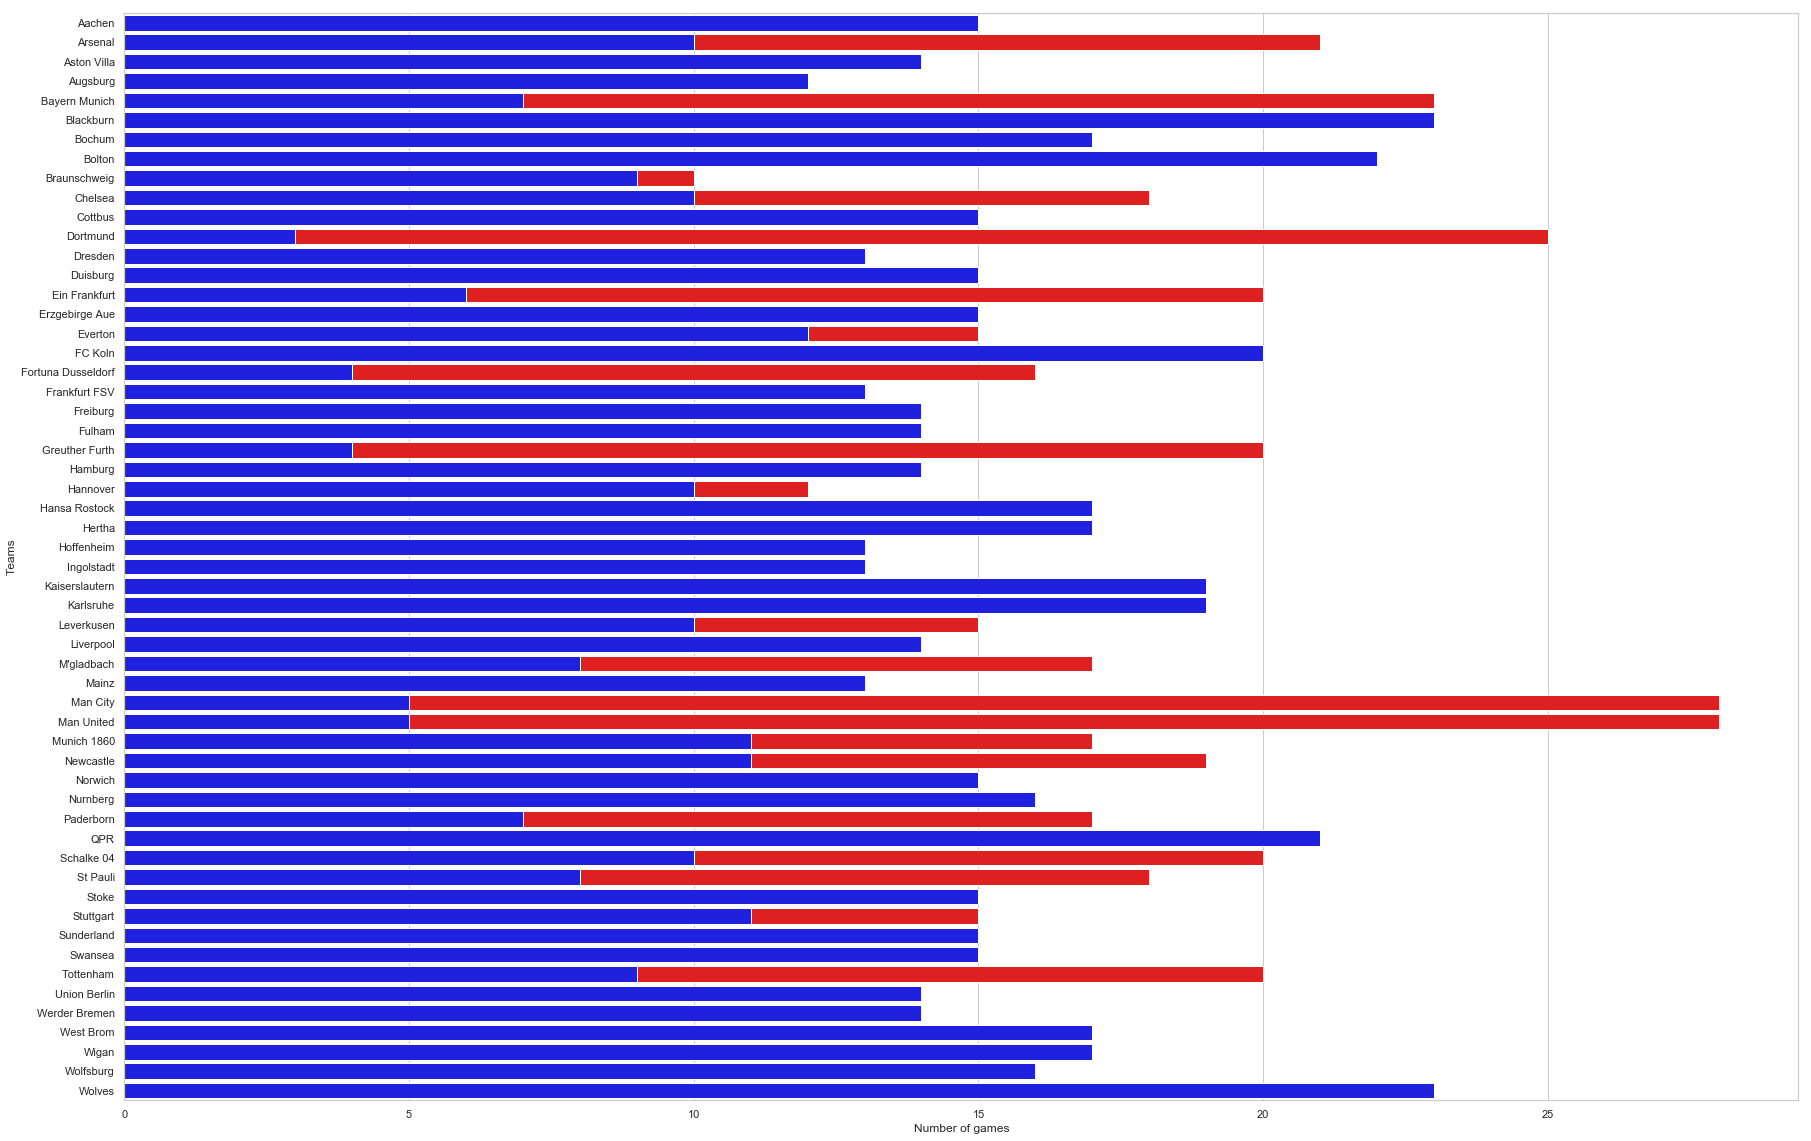

In [92]:
plt.figure(figsize=(30,20))
ax = sns.barplot(x="num_of_wins" , y = "Team", data=new_df1 , color='red')

ax2 = sns.barplot(x='num_of_lost', y="Team", data=new_df1, color ='blue')
plt.xlabel("Number of games")
plt.ylabel("Teams")

In [21]:
#2nd get dates and use darksky to check whether it rained on that day or not
Date = list(df.Date.unique())
Date

['2012-03-31',
 '2011-12-11',
 '2011-08-13',
 '2011-11-27',
 '2012-02-18',
 '2012-01-20',
 '2012-02-04',
 '2012-04-21',
 '2011-09-18',
 '2011-10-23',
 '2011-10-01',
 '2012-03-03',
 '2011-08-27',
 '2012-03-17',
 '2011-11-06',
 '2012-05-05',
 '2012-04-11',
 '2011-12-17',
 '2012-02-03',
 '2011-10-29',
 '2012-01-22',
 '2011-12-03',
 '2012-04-14',
 '2012-03-25',
 '2012-03-10',
 '2012-04-07',
 '2011-11-19',
 '2011-10-14',
 '2011-09-24',
 '2012-04-28',
 '2011-12-18',
 '2012-03-02',
 '2012-03-16',
 '2012-02-17',
 '2011-08-06',
 '2011-11-04',
 '2011-09-16',
 '2011-07-15',
 '2012-05-06',
 '2012-02-11',
 '2011-10-02',
 '2012-03-30',
 '2011-10-22',
 '2011-08-26',
 '2011-08-07',
 '2012-02-24',
 '2011-07-17',
 '2012-02-12',
 '2011-08-22',
 '2011-09-09',
 '2012-04-01',
 '2011-09-25',
 '2012-04-20',
 '2011-11-25',
 '2012-03-09',
 '2011-11-07',
 '2011-09-10',
 '2011-08-21',
 '2011-09-26',
 '2012-03-26',
 '2011-10-30',
 '2012-02-13',
 '2012-02-26',
 '2011-12-19',
 '2012-03-11',
 '2011-11-26',
 '2012-04-

In [22]:
import requests

In [23]:
# to get the current weather forecast
resp = requests.get("https://api.darksky.net/forecast/{'my_api'}/52.5200,13.4050")
resp.json()

{'latitude': 52.52,
 'longitude': 13.405,
 'timezone': 'Europe/Berlin',
 'currently': {'time': 1572607060,
  'summary': 'Overcast',
  'icon': 'cloudy',
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 44.92,
  'apparentTemperature': 38.47,
  'dewPoint': 30.92,
  'humidity': 0.58,
  'pressure': 1015.6,
  'windSpeed': 13.84,
  'windGust': 22.59,
  'windBearing': 151,
  'cloudCover': 0.92,
  'uvIndex': 1,
  'visibility': 6.298,
  'ozone': 290.9},
 'hourly': {'summary': 'Light rain starting this evening, continuing until tomorrow afternoon.',
  'icon': 'rain',
  'data': [{'time': 1572606000,
    'summary': 'Overcast',
    'icon': 'cloudy',
    'precipIntensity': 0,
    'precipProbability': 0,
    'temperature': 44.15,
    'apparentTemperature': 37.49,
    'dewPoint': 30.92,
    'humidity': 0.59,
    'pressure': 1016,
    'windSpeed': 13.8,
    'windGust': 22.56,
    'windBearing': 151,
    'cloudCover': 0.9,
    'uvIndex': 1,
    'visibility': 6.216,
    'ozone': 291},
  

In [24]:
# to get the weather forecast for that day
resp = requests.get("https://api.darksky.net/forecast/{'my_api'}/52.5200,13.4050,2011-12-11T12:00:00?currently,daily")
resp.json()

{'latitude': 52.52,
 'longitude': 13.405,
 'timezone': 'Europe/Berlin',
 'currently': {'time': 1323601200,
  'summary': 'Mostly Cloudy',
  'icon': 'partly-cloudy-day',
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 38.64,
  'apparentTemperature': 31.81,
  'dewPoint': 30.17,
  'humidity': 0.71,
  'windSpeed': 10.35,
  'windGust': 10.35,
  'windBearing': 237,
  'cloudCover': 0.61,
  'uvIndex': 0,
  'visibility': 6.216},
 'hourly': {'summary': 'Mostly cloudy throughout the day.',
  'icon': 'partly-cloudy-day',
  'data': [{'time': 1323558000,
    'summary': 'Mostly Cloudy',
    'icon': 'partly-cloudy-night',
    'precipIntensity': 0,
    'precipProbability': 0,
    'temperature': 37.43,
    'apparentTemperature': 28.54,
    'dewPoint': 30.17,
    'humidity': 0.75,
    'windSpeed': 14.99,
    'windGust': 14.99,
    'windBearing': 259,
    'cloudCover': 0.75,
    'uvIndex': 0,
    'visibility': 6.216},
   {'time': 1323561600,
    'summary': 'Mostly Cloudy',
    'icon': 'p

In [25]:
resp = requests.get("https://api.darksky.net/forecast/{'my_api'}/52.5200,13.4050,2011-12-11T12:00:00?currently,daily")
result = resp.json()

In [26]:
resp.json().keys()

dict_keys(['latitude', 'longitude', 'timezone', 'currently', 'hourly', 'daily', 'flags', 'offset'])

In [27]:
resp = requests.get("https://api.darksky.net/forecast/{'my_api'}/52.5200,13.4050,2011-12-11T12:00:00?currently,daily")
result = resp.json()

In [28]:
result['daily']

{'data': [{'time': 1323558000,
   'summary': 'Mostly cloudy throughout the day.',
   'icon': 'partly-cloudy-day',
   'sunriseTime': 1323587280,
   'sunsetTime': 1323615240,
   'moonPhase': 0.54,
   'precipIntensity': 0,
   'precipIntensityMax': 0,
   'precipProbability': 0,
   'temperatureHigh': 41.54,
   'temperatureHighTime': 1323605040,
   'temperatureLow': 30.55,
   'temperatureLowTime': 1323654360,
   'apparentTemperatureHigh': 34.94,
   'apparentTemperatureHighTime': 1323605040,
   'apparentTemperatureLow': 23.2,
   'apparentTemperatureLowTime': 1323658860,
   'dewPoint': 29.25,
   'humidity': 0.77,
   'windSpeed': 9.66,
   'windGust': 15.03,
   'windGustTime': 1323561060,
   'windBearing': 220,
   'cloudCover': 0.52,
   'uvIndex': 0,
   'uvIndexTime': 1323601080,
   'visibility': 6.212,
   'temperatureMin': 32.54,
   'temperatureMinTime': 1323640800,
   'temperatureMax': 41.54,
   'temperatureMaxTime': 1323605040,
   'apparentTemperatureMin': 25.41,
   'apparentTemperatureMinTim

In [29]:
result['daily'].keys()

dict_keys(['data'])

In [30]:
for key in result['daily'].keys():
    print(key, type(result['daily'][key]))

data <class 'list'>


In [31]:
result['daily']['data'][0]['icon']

'partly-cloudy-day'

In [32]:
weather = []
for date in Date:
    resp = requests.get("https://api.darksky.net/forecast/{'my_API'}/52.5200,13.4050,{}T12:00:00?currently,daily".format(date))
    result = resp.json()
    try:
        weather.append(result['daily']['data'][0]['icon'])
    except:
        weather.append(result['daily']['data'][0]['summary'])
print(weather)        

['rain', 'partly-cloudy-day', 'partly-cloudy-day', 'partly-cloudy-day', 'partly-cloudy-day', 'rain', 'partly-cloudy-day', 'partly-cloudy-day', 'rain', 'rain', 'Clear throughout the day.', 'Clear throughout the day.', 'rain', 'Clear throughout the day.', 'rain', 'rain', 'partly-cloudy-day', 'rain', 'partly-cloudy-day', 'Foggy in the morning.', 'rain', 'rain', 'Partly cloudy throughout the day.', 'partly-cloudy-day', 'partly-cloudy-day', 'partly-cloudy-day', 'partly-cloudy-day', 'Partly cloudy throughout the day.', 'Clear throughout the day.', 'Clear throughout the day.', 'rain', 'partly-cloudy-day', 'Clear throughout the day.', 'rain', 'rain', 'Foggy in the morning.', 'partly-cloudy-day', 'partly-cloudy-day', 'rain', 'partly-cloudy-day', 'Clear throughout the day.', 'partly-cloudy-day', 'Clear throughout the day.', 'rain', 'rain', 'rain', 'rain', 'partly-cloudy-day', 'partly-cloudy-day', 'rain', 'partly-cloudy-day', 'Clear throughout the day.', 'Mostly cloudy throughout the day.', 'rain

In [37]:
weather_report = dict(zip(Date,weather))
weather_report

{'2012-03-31': 'rain',
 '2011-12-11': 'partly-cloudy-day',
 '2011-08-13': 'partly-cloudy-day',
 '2011-11-27': 'partly-cloudy-day',
 '2012-02-18': 'partly-cloudy-day',
 '2012-01-20': 'rain',
 '2012-02-04': 'partly-cloudy-day',
 '2012-04-21': 'partly-cloudy-day',
 '2011-09-18': 'rain',
 '2011-10-23': 'rain',
 '2011-10-01': 'Clear throughout the day.',
 '2012-03-03': 'Clear throughout the day.',
 '2011-08-27': 'rain',
 '2012-03-17': 'Clear throughout the day.',
 '2011-11-06': 'rain',
 '2012-05-05': 'rain',
 '2012-04-11': 'partly-cloudy-day',
 '2011-12-17': 'rain',
 '2012-02-03': 'partly-cloudy-day',
 '2011-10-29': 'Foggy in the morning.',
 '2012-01-22': 'rain',
 '2011-12-03': 'rain',
 '2012-04-14': 'Partly cloudy throughout the day.',
 '2012-03-25': 'partly-cloudy-day',
 '2012-03-10': 'partly-cloudy-day',
 '2012-04-07': 'partly-cloudy-day',
 '2011-11-19': 'partly-cloudy-day',
 '2011-10-14': 'Partly cloudy throughout the day.',
 '2011-09-24': 'Clear throughout the day.',
 '2012-04-28': 'Cl

In [38]:
weather_df = pd.DataFrame.from_dict(weather_report, orient = 'index')
weather_df.columns = ['weather_summary']
weather_df.head()

,weather_summary
2012-03-31,rain
2011-12-11,partly-cloudy-day
2011-08-13,partly-cloudy-day
2011-11-27,partly-cloudy-day
2012-02-18,partly-cloudy-day


In [52]:
#join the weather_summary table to the main DataFrame
new = df.join(weather_df, on = 'Date')
new_columns = ['MatchId','Div','Season','Date','Hometeam','FTHG','FTR','WEATHER']
new.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather_summary
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day


In [53]:
new.groupby('HomeTeam')['FTAG'].sum()

HomeTeam
Aachen                24
Arsenal               17
Aston Villa           25
Augsburg              19
Bayern Munich          6
Blackburn             33
Bochum                23
Bolton                39
Braunschweig          15
Chelsea               24
Cottbus               25
Dortmund              12
Dresden               20
Duisburg              18
Ein Frankfurt         12
Erzgebirge Aue        22
Everton               15
FC Koln               29
Fortuna Dusseldorf    17
Frankfurt FSV         26
Freiburg              20
Fulham                26
Greuther Furth        12
Hamburg               29
Hannover              17
Hansa Rostock         32
Hertha                29
Hoffenheim            17
Ingolstadt            21
Kaiserslautern        28
Karlsruhe             28
Leverkusen            24
Liverpool             16
M'gladbach            10
Mainz                 26
Man City              12
Man United            19
Munich 1860           22
Newcastle             17
Norwich         

In [54]:
new['Div'].unique()

array(['D1', 'D2', 'E0'], dtype=object)

In [56]:
new.shape

(992, 10)

In [57]:
#simple lazy way to remove E0 which is the premier league
new = new[new.Div!='E0']
new.shape # check new shape

(612, 10)

In [72]:
# create a new rainy day column
new['rainy_day'] = 0

In [73]:
new[new.weather_summary == 'rain'] = new[new.weather_summary == 'rain'].assign(rainy_day = 1)

In [74]:
new

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather_summary,rainy_day
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain,1
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day,0
5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H,rain,1
6,1098,D1,2011,2012-02-04,Hamburg,Bayern Munich,1,1,D,partly-cloudy-day,0
7,1099,D1,2011,2012-04-21,Werder Bremen,Bayern Munich,1,2,A,partly-cloudy-day,0
8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,rain,1
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H,rain,1


In [75]:
new['game_won'] = 0
new['game_loss'] = 0
new.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather_summary,rainy_day,game_won,game_loss
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain,1,0,0
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day,0,0,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day,0,0,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day,0,0,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day,0,0,0


In [76]:
new.groupby('HomeTeam').sum()

,Match_ID,Season,FTHG,FTAG,rainy_day,game_won,game_loss
HomeTeam,,,,,,,
Aachen,24768,34187,15,24,5,0,0
Augsburg,22397,34187,20,19,7,0,0
Bayern Munich,22898,34187,49,6,4,0,0
Bochum,24898,34187,23,23,5,0,0
Braunschweig,24745,34187,21,15,4,0,0
Cottbus,24780,34187,18,25,5,0,0
Dortmund,22899,34187,44,12,5,0,0
Dresden,25114,34187,30,20,4,0,0
Duisburg,25095,34187,23,18,7,0,0


In [77]:
new[new.FTR == 'H'] = new[new.FTR == 'H'].assign(game_won = 1)
new[new.FTR == 'A'] = new[new.FTR == 'A'].assign(game_loss = 1)

In [79]:
new.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather_summary,rainy_day,game_won,game_loss
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain,1,0,1
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day,0,0,1
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day,0,0,1
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day,0,1,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day,0,0,0


In [80]:
new.shape

(612, 13)

In [81]:
#.sum() of Hometeam
new.groupby('HomeTeam').sum()

,Match_ID,Season,FTHG,FTAG,rainy_day,game_won,game_loss
HomeTeam,,,,,,,
Aachen,24768,34187,15,24,5,4,7
Augsburg,22397,34187,20,19,7,6,4
Bayern Munich,22898,34187,49,6,4,14,2
Bochum,24898,34187,23,23,5,7,7
Braunschweig,24745,34187,21,15,4,6,3
Cottbus,24780,34187,18,25,5,4,5
Dortmund,22899,34187,44,12,5,14,1
Dresden,25114,34187,30,20,4,8,4
Duisburg,25095,34187,23,18,7,8,7


In [82]:
#creating a new row for the rain day wins and loss
new['rain_win'] = 0
new['rain_loss'] = 0

In [83]:
new.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather_summary,rainy_day,game_won,game_loss,rain_win,rain_loss
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain,1,0,1,0,0
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day,0,0,1,0,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day,0,0,1,0,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day,0,1,0,0,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day,0,0,0,0,0


In [84]:
# assigning wins 
new[new.game_won == 1] = new[new.game_won== 1].assign(rain_win = 1)
new[new.game_loss == 1] = new[new.game_loss == 1].assign(rain_loss = 1)

In [85]:
new.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather_summary,rainy_day,game_won,game_loss,rain_win,rain_loss
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain,1,0,1,0,1
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day,0,0,1,0,1
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day,0,0,1,0,1
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day,0,1,0,1,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day,0,0,0,0,0


In [87]:
#percetage count of Total wins in rainy days
new.rain_win.value_counts(normalize=True)

0    0.544118
1    0.455882
Name: rain_win, dtype: float64

In [89]:
#percentage count of Total 
new.game_won.value_counts(normalize=True)

0    0.544118
1    0.455882
Name: game_won, dtype: float64

In [91]:
# percentage count of rainy day wins
new.rain_win.value_counts(normalize=True)

0    0.544118
1    0.455882
Name: rain_win, dtype: float64

In [97]:
new.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,weather_summary,rainy_day,game_won,game_loss,rain_win,rain_loss
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain,1,0,1,0,1
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day,0,0,1,0,1
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day,0,0,1,0,1
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,partly-cloudy-day,0,1,0,1,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,partly-cloudy-day,0,0,0,0,0


In [ ]:
# class and object

In [147]:
import json

In [169]:
#i put loc=[''] so you can change
#loc[0] = first position of the cordinates
#loc[1] = second position of the cordinates
class weathergetter(object):
    """ while initialising the object can take two values, one for location which is provided as a list
        and the other for url for where request has to be made.
        the url should have {} in the place of api, lat long, date
    """
    def __init__(self, loc=['52.520', '13.405'], url="https://api.darksky.net/forecast/{}/{},{},{}T12:00:00?currently,daily"):
        self.lat = loc[0]
        self.long = loc[1]
        self.url = url

    
    def get_keys(self , path='/Users/flatironschool/.secret/darksky.json'):
        with open(path) as f:
            keys = json.load(f)
        return keys['api_key']
        
    #request a date to try and test   
    def this_date(self, date):
        
        weather =[]
        resp = requests.get(self.url.format(self.get_keys(),self.lat,self.long,date))
        result = resp.json()
        try:
            weather.append(result['daily']['data'][0]['icon'])
        except:
            weather.append(result['daily']['data'][0]['summary'])
        return weather
 
    def many_dates(self, list_of_dates):
        summary = []
        for date in list_of_dates:
            summary.append(self.this_date(date))
        return summary

In [170]:
#creating an object
w = weathergetter()
type(w)

__main__.weathergetter

In [171]:
w.this_date('2011-12-11')

['partly-cloudy-day']

In [172]:
w.many_dates(Date)

[['rain'],
 ['partly-cloudy-day'],
 ['partly-cloudy-day'],
 ['partly-cloudy-day'],
 ['partly-cloudy-day'],
 ['rain'],
 ['partly-cloudy-day'],
 ['partly-cloudy-day'],
 ['rain'],
 ['rain'],
 ['Clear throughout the day.'],
 ['Clear throughout the day.'],
 ['rain'],
 ['Clear throughout the day.'],
 ['rain'],
 ['rain'],
 ['partly-cloudy-day'],
 ['rain'],
 ['partly-cloudy-day'],
 ['Foggy in the morning.'],
 ['rain'],
 ['rain'],
 ['Partly cloudy throughout the day.'],
 ['partly-cloudy-day'],
 ['partly-cloudy-day'],
 ['partly-cloudy-day'],
 ['partly-cloudy-day'],
 ['Partly cloudy throughout the day.'],
 ['Clear throughout the day.'],
 ['Clear throughout the day.'],
 ['rain'],
 ['partly-cloudy-day'],
 ['Clear throughout the day.'],
 ['rain'],
 ['rain'],
 ['Foggy in the morning.'],
 ['partly-cloudy-day'],
 ['partly-cloudy-day'],
 ['rain'],
 ['partly-cloudy-day'],
 ['Clear throughout the day.'],
 ['partly-cloudy-day'],
 ['Clear throughout the day.'],
 ['rain'],
 ['rain'],
 ['rain'],
 ['rain'],
 [